# Numerisk derivasjon

In [1]:
# vi importer numpy og matplotlib pakkene

import numpy as np
import matplotlib.pyplot as plt

Gitt en funksjon $f(x)$ og en liste $$x = [x_0, x_1, \dots, x_n]$$ av $x$-verdier kan vi konstruere listen $$y = [f(x_0), f(x_1), \dots, f(x_n)]$$ av funksjonsverdier.

Ideen bak numerisk derivasjon er ut i fra listene $x$ og $y$ å lage en liste
$$z = [z_1, z_2, \dots, z_n]$$
som er så lik listen
$$[f'(x_1), f'(x_2), \dots, f'(x_n)]$$
av verdier til den deriverte funksjonen
som vi får til uten å vide mere om funksjonen $f(x)$ enn verdiene i listen $x$ og funksjonsverdiene i listen $y$.

La oss se på eksemplet $f(x) = \sin(x)$ med `x = [-3.  , -2.25, -1.5 , -0.75,  0.  ,  0.75,  1.5 ,  2.25,  3.  ]`.

In [2]:
# genererer listen x

n = 18 # antall tall i listene
x = np.linspace(-3, 3, n) # konstruerer listen x

In [3]:
# genererer listen y

y = np.sin(x) # funksjonsverdier for f(x) = sin(x)

In [4]:
# bruker innebygget metode til å finne en liste z

z = np.gradient(y, x) # innebygget funksjon i numpy for numerisk derivasjon

Siden vi vet at den deriverte funksjonen til $$f(x) = \sin(x)$$
er funksjonen
$$f'(x) = \cos(x)$$
håper vi at listen $z$ har de samme tallene i seg som listen $\cos(x)$. La oss se på tallene:

In [5]:
z

array([-0.94492057, -0.8620297 , -0.64822194, -0.35450155, -0.0170783 ,
        0.32245036,  0.62222743,  0.84529645,  0.96415754,  0.96415754,
        0.84529645,  0.62222743,  0.32245036, -0.0170783 , -0.35450155,
       -0.64822194, -0.8620297 , -0.94492057])

In [6]:
np.cos(x)

array([-0.9899925 , -0.88019006, -0.66187802, -0.36196982, -0.01743808,
        0.32924342,  0.63533588,  0.86310429,  0.98446943,  0.98446943,
        0.86310429,  0.63533588,  0.32924342, -0.01743808, -0.36196982,
       -0.66187802, -0.88019006, -0.9899925 ])

At tallene er nær hverandre er det samme som at differansen er liten.

In [7]:
z - np.cos(x)

array([ 0.04507193,  0.01816036,  0.01365608,  0.00746828,  0.00035979,
       -0.00679306, -0.01310845, -0.01780784, -0.02031189, -0.02031189,
       -0.01780784, -0.01310845, -0.00679306,  0.00035979,  0.00746828,
        0.01365608,  0.01816036,  0.04507193])

Vi kan også plotte $z$ og $\cos(x)$ mot $x$ og se om grafene ser like ut.

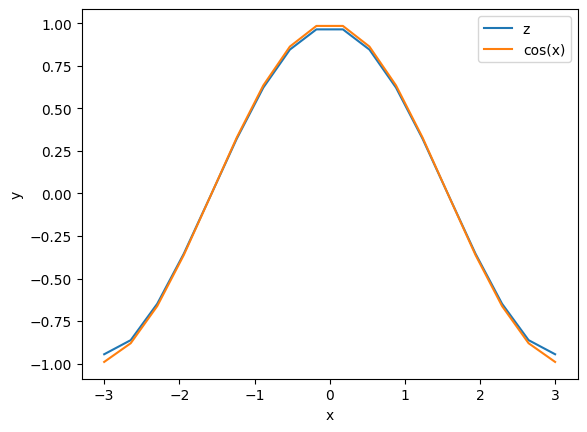

In [8]:
plt.plot(x,z, label='z')
plt.plot(x, np.cos(x), label='cos(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

## Oppgave

Skriv en kodesnutt som beregner tallene i z uten bruk av numpy pakken.

Numerisk derivasjon kan gjøres med tre forskjellige differanser:

![differanser](https://github.com/mbr085/V26MAT102/blob/main/notebooks/uke4/figures/Finite_difference_method.svg?raw=1)
([By Kakitc - Own work, CC BY-SA 4.0](https://commons.wikimedia.org/w/index.php?curid=63327976))

### Spørsmål

Hva er formlene for de tre forskjellige differansene?

### Beste numeriske deriverte

Hvis vi kan beregne sentral differanse er det en bedre tilnærming enn fremover differanse og bakover differanse.

Det beste vi kan gjøre er å beregne z-verdiene slik:

$$z_0 = \text{fremover differanse i $y_1$}$$

$$z_1 = \text{sentral differanse i $y_1$}$$

$$z_2 = \text{sentral differanse i $y_2$}$$

$$\vdots$$

$$z_{n-1} = \text{sentral differanse i $y_{n-1}$}$$

$$z_{n} = \text{bakover differanse i $y_{n-1}$}$$

In [9]:
def sentral_diffeanser(y, x):
    """
    Beregner den sentrale differansen til en funksjon.

    Parameters
    ----------
    y : array_like
        En array med funksjonsverdier.
    x : array_like
        En array med argumentverdier.

    Returns
    -------
    dy : array_like
        En array med den sentrale differansen til funksjonen.
    """
    dy = []  # Initialiserer en tom liste for å lagre de sentrale differansene
    for i in range(1, len(y) - 1):  # Itererer gjennom elementene i y, unntatt det første og siste
        # Beregner den sentrale differansen for hvert element
        dy.append((y[i + 1] - y[i - 1]) / (x[i + 1] - x[i - 1]))
    return dy  # Returnerer listen med de sentrale differansene

In [10]:
def gradient(y, x):
    """
    Beregner den numeriske gradienten til en funksjon.

    Parameters
    ----------
    y : array_like
        En array med funksjonsverdier.
    x : array_like
        En array med argumentverdier.

    Returns
    -------
    dy : array_like
        En array med den numeriske gradienten til funksjonen.
    """
    # Beregner fremoverdifferansen for det første elementet
    fremover_differanse = (y[1] - y[0]) / (x[1] - x[0])
    # Beregner bakoverdifferansen for det siste elementet
    bakover_differanse = (y[-1] - y[-2]) / (x[-1] - x[-2])
    # Beregner den sentrale differansen for de midterste elementene
    # og kombinerer resultatene i en enkelt liste
    return [fremover_differanse] + sentral_diffeanser(y, x) + [bakover_differanse]

La oss sjekke at vi får samme resultat som numpy:

In [11]:
z - gradient(y, x)

array([ 0.00000000e+00, -1.11022302e-16,  1.11022302e-16,  5.55111512e-17,
       -2.08166817e-17,  2.22044605e-16, -1.11022302e-16,  0.00000000e+00,
        1.11022302e-16,  1.11022302e-16,  0.00000000e+00, -3.33066907e-16,
        3.33066907e-16, -5.30825384e-16,  4.99600361e-16, -2.22044605e-16,
        0.00000000e+00,  0.00000000e+00])